In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('Ignore')

AssertionError: invalid action: 'Ignore'

In [2]:
df=pd.read_csv('GlobalLandTemperaturesByCountry.csv')

C:\Users\ELCOT\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Unnamed: 4,Unnamed: 5,Country.1
0,1743-11-01,4.384,2.294,Åland,NaN,NaN,Åland
1,1743-12-01,NaN,NaN,Åland,NaN,NaN,Afghanistan
2,1744-01-01,NaN,NaN,Åland,NaN,NaN,Africa
3,1744-02-01,NaN,NaN,Åland,NaN,NaN,Albania
4,1744-03-01,NaN,NaN,Åland,NaN,NaN,Algeria


In [4]:
df=df.fillna(method="ffill")

In [5]:
df.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Unnamed: 4,Unnamed: 5,Country.1
0,1743-11-01,4.384,2.294,Åland,NaN,NaN,Åland
1,1743-12-01,4.384,2.294,Åland,NaN,NaN,Afghanistan
2,1744-01-01,4.384,2.294,Åland,NaN,NaN,Africa
3,1744-02-01,4.384,2.294,Åland,NaN,NaN,Albania
4,1744-03-01,4.384,2.294,Åland,NaN,NaN,Algeria
5,1744-04-01,1.530,4.680,Åland,NaN,NaN,American Samoa
6,1744-05-01,6.702,1.789,Åland,NaN,NaN,Andorra
7,1744-06-01,11.609,1.577,Åland,NaN,NaN,Angola
8,1744-07-01,15.342,1.410,Åland,NaN,NaN,Anguilla
9,1744-08-01,15.342,1.410,Åland,NaN,NaN,Antarctica


In [6]:
df.shape

(577462, 7)

In [7]:
df.isnull().sum()

dt                                    0
AverageTemperature                    0
AverageTemperatureUncertainty         0
Country                               0
Unnamed: 4                       577462
Unnamed: 5                       577462
Country.1                             0
dtype: int64

In [8]:
df.drop('Unnamed: 4',axis=1,inplace=True)

In [9]:
df.drop('Unnamed: 5',axis=1,inplace=True)

In [10]:
df.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Country.1
0,1743-11-01,4.384,2.294,Åland,Åland
1,1743-12-01,4.384,2.294,Åland,Afghanistan
2,1744-01-01,4.384,2.294,Åland,Africa
3,1744-02-01,4.384,2.294,Åland,Albania
4,1744-03-01,4.384,2.294,Åland,Algeria
5,1744-04-01,1.530,4.680,Åland,American Samoa
6,1744-05-01,6.702,1.789,Åland,Andorra
7,1744-06-01,11.609,1.577,Åland,Angola
8,1744-07-01,15.342,1.410,Åland,Anguilla
9,1744-08-01,15.342,1.410,Åland,Antarctica


In [11]:
df.rename(columns={'dt':'Date'},inplace=True)

In [12]:
df.head()

,Date,AverageTemperature,AverageTemperatureUncertainty,Country,Country.1
0,1743-11-01,4.384,2.294,Åland,Åland
1,1743-12-01,4.384,2.294,Åland,Afghanistan
2,1744-01-01,4.384,2.294,Åland,Africa
3,1744-02-01,4.384,2.294,Åland,Albania
4,1744-03-01,4.384,2.294,Åland,Algeria


In [13]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.index

DatetimeIndex(['1743-11-01', '1743-12-01', '1744-01-01', '1744-02-01',
               '1744-03-01', '1744-04-01', '1744-05-01', '1744-06-01',
               '1744-07-01', '1744-08-01',
               ...
               '2012-01-12', '2013-01-01', '2013-01-02', '2013-01-03',
               '2013-01-04', '2013-01-05', '2013-01-06', '2013-01-07',
               '2013-01-08', '2013-01-09'],
              dtype='datetime64[ns]', name='Date', length=577462, freq=None)

In [14]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,577462.000000,577462.000000
mean,17.399923,1.077051
std,10.832390,1.218259
min,-37.658000,0.052000
25%,10.354000,0.333000
50%,21.271000,0.617000
75%,25.777000,1.340000
max,38.842000,15.003000


In [15]:
df['Year']=df.index.year
df.head()

,AverageTemperature,AverageTemperatureUncertainty,Country,Country.1,Year
Date,,,,,
1743-11-01,4.384,2.294,Åland,Åland,1743
1743-12-01,4.384,2.294,Åland,Afghanistan,1743
1744-01-01,4.384,2.294,Åland,Africa,1744
1744-02-01,4.384,2.294,Åland,Albania,1744
1744-03-01,4.384,2.294,Åland,Algeria,1744


In [16]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty,Year
count,577462.000000,577462.000000,577462.000000
mean,17.399923,1.077051,1908.819188
std,10.832390,1.218259,65.916942
min,-37.658000,0.052000,1743.000000
25%,10.354000,0.333000,1862.000000
50%,21.271000,0.617000,1914.000000
75%,25.777000,1.340000,1964.000000
max,38.842000,15.003000,2013.000000


In [17]:
latest_df=df.loc['1980':'2013']
latest_df.head()

,AverageTemperature,AverageTemperatureUncertainty,Country,Country.1,Year
Date,,,,,
1980-01-01,-4.073,0.518,Åland,Zimbabwe,1980
1980-01-02,-6.484,0.441,Åland,Zimbabwe,1980
1980-01-03,-3.947,0.466,Åland,Zimbabwe,1980
1980-01-04,2.928,0.597,Åland,Zimbabwe,1980
1980-01-05,6.154,0.241,Åland,Zimbabwe,1980


In [18]:
latest_df[['Country','AverageTemperature']].groupby(['Country']).mean().sort_values('AverageTemperature')

,AverageTemperature
Country,
Greenland,-17.778136
Denmark,-17.244677
Svalbard And Jan Mayen,-6.557375
Russia,-4.351694
Canada,-4.019440
...,...
Senegal,28.631548
Burkina Faso,28.683859
Mali,29.106677


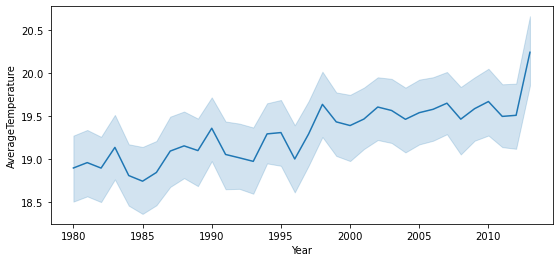

In [22]:
plt.figure(figsize=(9,4))
sns.lineplot(x="Year",y="AverageTemperature",data=latest_df)
plt.show()

In [23]:
resample_df=latest_df[['AverageTemperature']].resample('A').mean()

In [24]:
resample_df.head()

,AverageTemperature
Date,
1980-12-31,18.896044
1981-12-31,18.958601
1982-12-31,18.894896
1983-12-31,19.135776
1984-12-31,18.808047


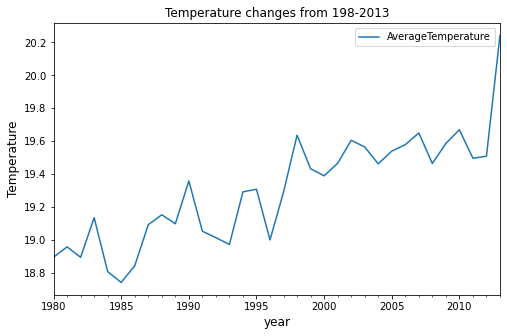

In [26]:
resample_df.plot(title="Temperature changes from 198-2013",figsize=(8,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('year',fontsize=12)
plt.show()

In [33]:
from statsmodels.tsa.stattools import adfuller
print('Test results:')
test_df=adfuller(resample_df.iloc[:10].values,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['Test statistic','p-value','Lags used','Number of observations used'])
for key,value in test_df[4].items():
    df_output['Critical Value (%s)'%key]=value
print(df_output)

Test results:
Test statistic                -1.596314
p-value                        0.485445
Lags used                      3.000000
Number of observations used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


In [34]:
decomp=seasonal_decompose(resample_df,freq=3)
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

<ipython-input-34-42b847f2c6db>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomp=seasonal_decompose(resample_df,freq=3)


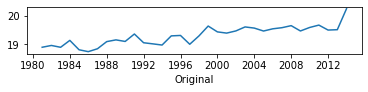

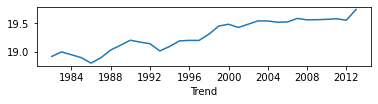

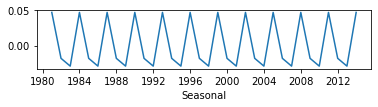

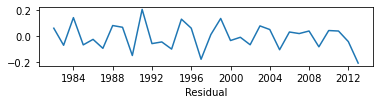

<Figure size 432x360 with 0 Axes>

In [35]:
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

plt.subplot(412)
plt.plot(trend)
plt.xlabel('Trend')
plt.figure(figsize=(6,5))

plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('Seasonal')
plt.figure(figsize=(6,5))

plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residual')
plt.figure(figsize=(6,5))

plt.tight_layout()

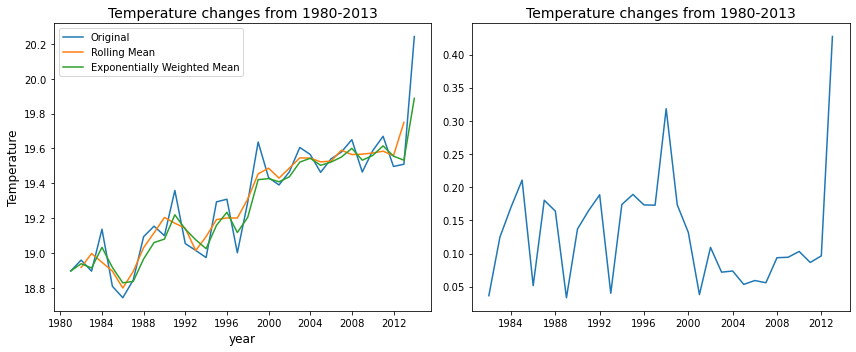

In [37]:
rol_mean=resample_df.rolling(window=3,center=True).mean()
ewm=resample_df.ewm(span=3).mean()
rol_std=resample_df.rolling(window=3,center=True).std()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))

ax1.plot(resample_df,label='Original')
ax1.plot(rol_mean,label='Rolling Mean')
ax1.plot(ewm,label='Exponentially Weighted Mean')
ax1.set_title('Temperature changes from 1980-2013',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('year',fontsize=12)
ax1.legend()

ax2.plot(rol_std,label='Rolling STD')
ax2.set_title('Temperature changes from 1980-2013',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('year',fontsize=12)
ax1.legend()

plt.tight_layout()
plt.show()

In [42]:
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)
print('Dickey fuller test for the rolling mean:')
df_test=adfuller(rol_mean.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['Test statistic','p-value','Lags used','Number of observations used'])
for key,value in test_df[4].items():
    df_output['Critical Value (%s)'%key]=value
print(df_output)
print('')
print('Dickey fuller test for the Exponentially Weighted Mean:')
df_test=adfuller(ewm.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['Test statistic','p-value','Lags used','Number of observations used'])
for key,value in test_df[4].items():
    df_output['Critical Value (%s)'%key]=value
print(df_output)

Dickey fuller test for the rolling mean:
Test statistic                -1.596314
p-value                        0.485445
Lags used                      3.000000
Number of observations used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64

Dickey fuller test for the Exponentially Weighted Mean:
Test statistic                -1.596314
p-value                        0.485445
Lags used                      3.000000
Number of observations used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


In [43]:
diff_rol_mean=resample_df-rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,AverageTemperature
Date,
1981-12-31,0.042087
1982-12-31,-0.101528
1983-12-31,0.189536
1984-12-31,-0.087390
1985-12-31,-0.055720


In [49]:
diff_ewm=resample_df-ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

,AverageTemperature
Date,
1980-12-31,0.000000
1981-12-31,0.020852
1982-12-31,-0.018365
1983-12-31,0.103840
1984-12-31,-0.108333


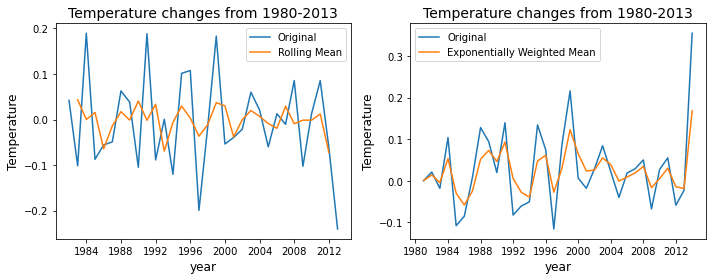

In [50]:
df_rol_mean_diff=diff_rol_mean.rolling(window=3,center=True).mean()
df_ewm_diff = diff_ewm.ewm(span=3).mean()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))

ax1.plot(diff_rol_mean,label='Original')
ax1.plot(df_rol_mean_diff,label='Rolling Mean')
ax1.set_title('Temperature changes from 1980-2013',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('year',fontsize=12)
ax1.legend()

ax2.plot(diff_ewm,label='Original')
ax2.plot(df_ewm_diff,label='Exponentially Weighted Mean')
ax2.set_title('Temperature changes from 1980-2013',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('year',fontsize=12)
ax2.legend()

plt.tight_layout()

In [51]:
print('dickey-Fuller test for the difference between the original and rolling mean:')
dftest=adfuller(diff_rol_mean.iloc[:,0].values,autolag='AIC')
dfoutput=pd.Series(test_df[0:4],index=['Test statistic','p-value','Lags used','Number of observations used'])
for key,value in test_df[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)
print('')
print('Dickey fuller test for the difference between the original and   Exponentially Weighted Mean:')
dftest=adfuller(diff_ewm.iloc[:,0].values,autolag='AIC')
dfoutput=pd.Series(test_df[0:4],index=['Test statistic','p-value','Lags used','Number of observations used'])
for key,value in test_df[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)

dickey-Fuller test for the difference between the original and rolling mean:
Test statistic                -1.596314
p-value                        0.485445
Lags used                      3.000000
Number of observations used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64

Dickey fuller test for the Exponentially Weighted Mean:
Test statistic                -1.596314
p-value                        0.485445
Lags used                      3.000000
Number of observations used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


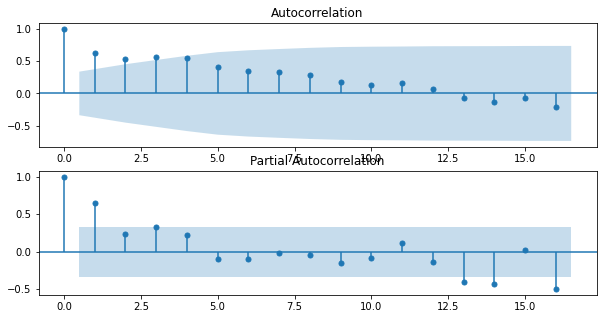

In [53]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

pyplot.figure(figsize=(10,5))
pyplot.subplot(211)
plot_acf(resample_df,ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(resample_df,ax=pyplot.gca())
pyplot.show()